# SIMPLE RANDOM TREE ON ORIGINAL DATA

In [2]:
from PIL import Image
import numpy as np
import os

# Import Data

In [3]:
import random

def import_dataset():
    shapes = ["circle", "square", "triangle", "star"]
    X = []
    y = []

    for shape in shapes:
        shape_files = os.listdir(f"shapes/{shape}")
        

        for image in shape_files:
            X.append(np.asarray(Image.open(f"shapes/{shape}/{image}")))
            y.append(shape)

    return X, y

X_original_set, y_original_set = import_dataset()

In [4]:
X_original_set = [np.asarray(row).flatten() for row in X_original_set]

# Encoding and Split Data

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc_o = le.fit_transform(y_original_set)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_original_set, y_enc_o, test_size=1/4)
print("(samples,features)")
print(np.shape(X_train))
print(np.shape(y_train))

(samples,features)
(11227, 40000)
(11227,)


# Train Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(bootstrap=True)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Test

In [8]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

1.0


# Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[971   0   0   0]
 [  0 866   0   0]
 [  0   0 960   0]
 [  0   0   0 946]]
1.0


# Individual Image Tests

In [10]:
pil_image1 = Image.open("shapes/test_star.png").convert('1').resize((200, 200))
test_image1 = [ 255 if pixel else 0 for pixel in np.asarray(pil_image1).flatten() ]

le.inverse_transform(classifier.predict([test_image1]))

array(['star'], dtype='<U8')

# Test on enlarged data set

In [11]:

def import_dataset2():
    shapes = ["circle", "square", "triangle", "star"]
    X = []
    y = []

    for shape in shapes:
        shape_files = os.listdir(f"shapes/set2/{shape}")
        # random.shuffle(shape_files)
        lengthy = len(shape_files)
        for i_pos in range(lengthy):
            pil_image = Image.open("shapes/set2/"+str(shape)+"/"+str(i_pos)+".png").convert('1').resize((200, 200))
            test_image = [ 255 if pixel else 0 for pixel in np.asarray(pil_image).flatten() ]
            X.append(test_image)
            y.append(shape)

    return X, y

X_bigset, y_bigset = import_dataset2()
print(np.shape(X_bigset))

(1200, 40000)


In [12]:

y_enc_o2 = le.fit_transform(y_bigset)

y_pred_1_2 = classifier.predict(X_bigset)
from sklearn.metrics import accuracy_score

print(accuracy_score(y_enc_o2, y_pred_1_2))

0.5


In [13]:
print(confusion_matrix(y_enc_o2, y_pred_1_2))


[[100 200   0   0]
 [  0 300   0   0]
 [  0 200 100   0]
 [  0 200   0 100]]


# Split large data

In [14]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_bigset, y_enc_o2, test_size=1/4)
print("Training set shape:")
print("(samples,features)")
print(np.shape(X_train_2))
print("Labels shape:")
print(np.shape(y_train_2))

print("Testing set shape:")
print("(samples,features)")
print(np.shape(X_train_2))
print("Labels shape:")
print(np.shape(y_train_2))

Training set shape:
(samples,features)
(900, 40000)
Labels shape:
(900,)
Testing set shape:
(samples,features)
(900, 40000)
Labels shape:
(900,)


# New classifier

# # Train [enlarged data only]

In [15]:


classifier_2 = RandomForestClassifier(bootstrap=True)
classifier_2.fit(X_train_2, y_train_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Test: enlarged data 

In [16]:
y_pred_2 = classifier_2.predict(X_test_2)

print(accuracy_score(y_test_2, y_pred_2))

1.0


In [17]:
print(confusion_matrix(y_test_2, y_pred_2))

[[85  0  0  0]
 [ 0 74  0  0]
 [ 0  0 80  0]
 [ 0  0  0 61]]


#  Test: original data 

In [18]:
y_pred_2_1 = classifier_2.predict(X_test)

print(accuracy_score(y_test, y_pred_2_1))

0.38231365215068125


In [19]:
print(confusion_matrix(y_test, y_pred_2_1))

[[ 40 514 417   0]
 [  0 186 411 269]
 [  0   0 771 189]
 [  0   1 511 434]]


# Combine training sets

In [20]:

X_train_3 = X_train + X_train_2
y_train_3 = np.concatenate([y_train,y_train_2])
X_test_3 = X_test + X_test_2
y_test_3 = np.concatenate([y_test,y_test_2])


# Train

In [21]:
classifier_3 = RandomForestClassifier(bootstrap=True)
classifier_3.fit(X_train_3, y_train_3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred_3 = classifier_3.predict(X_test_3)

print(accuracy_score(y_test_3, y_pred_3))
print(confusion_matrix(y_test_3, y_pred_3))

1.0
[[1056    0    0    0]
 [   0  940    0    0]
 [   0    0 1040    0]
 [   0    0    0 1007]]


# Test using internet images

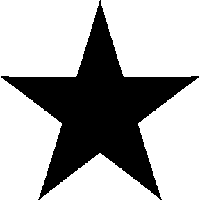

array(['star'], dtype='<U8')

In [23]:
pil_image12 = Image.open("shapes/BlackStar.png").convert('1').resize((200, 200))
test_image12 = [ 255 if pixel else 0 for pixel in np.asarray(pil_image12).flatten() ]
display(pil_image12)
le.inverse_transform(classifier_3.predict([test_image12]))



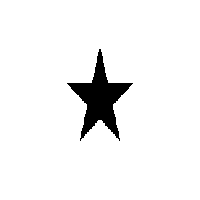

array(['star'], dtype='<U8')

In [24]:

pil_image14 = Image.open("shapes/black_star3.png").convert('1').resize((200, 200))
test_image14 = [ 255 if pixel else 0 for pixel in np.asarray(pil_image14).flatten() ]
display(pil_image14)
le.inverse_transform(classifier_3.predict([test_image14]))



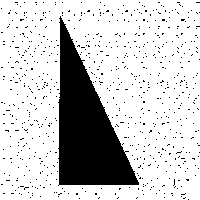

array(['triangle'], dtype='<U8')

In [25]:
pil_image15 = Image.open("shapes/black_triangle1.png").convert('1').resize((200, 200))
test_image15 = [ 255 if pixel else 0 for pixel in np.asarray(pil_image15).flatten() ]
display(pil_image15)
le.inverse_transform(classifier_3.predict([test_image15]))

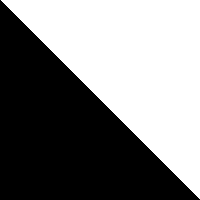

array(['triangle'], dtype='<U8')

In [26]:
pil_image16 = Image.open("shapes/black_triangle2.png").convert('1').resize((200, 200))
test_image16 = [ 255 if pixel else 0 for pixel in np.asarray(pil_image16).flatten() ]
display(pil_image16)
le.inverse_transform(classifier_3.predict([test_image16]))

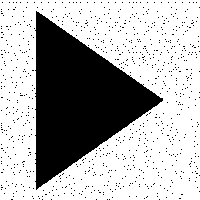

array(['triangle'], dtype='<U8')

In [27]:
pil_image17 = Image.open("shapes/black_triangle4.png").convert('1').resize((200, 200))
test_image17 = [ 255 if pixel else 0 for pixel in np.asarray(pil_image17).flatten() ]
display(pil_image17)
le.inverse_transform(classifier_3.predict([test_image16]))

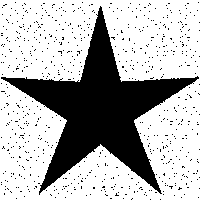

array(['star'], dtype='<U8')

In [28]:
pil_image13 = Image.open("shapes/black_star2.png").convert('1').resize((200, 200))
test_image13 = [ 255 if pixel else 0 for pixel in np.asarray(pil_image13).flatten() ]
display(pil_image13)
le.inverse_transform(classifier_3.predict([test_image13]))

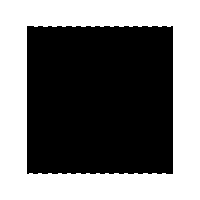

array(['square'], dtype='<U8')

In [30]:
pil_image131 = Image.open("shapes/black_test1.png").convert('1').resize((200, 200))
test_image131 = [ 255 if pixel else 0 for pixel in np.asarray(pil_image131).flatten() ]
display(pil_image131)
le.inverse_transform(classifier_3.predict([test_image131]))

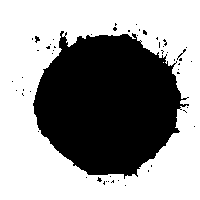

array(['circle'], dtype='<U8')

In [31]:
pil_image135 = Image.open("shapes/circle_test1.png").convert('1').resize((200, 200))
test_image135 = [ 255 if pixel else 0 for pixel in np.asarray(pil_image135).flatten() ]
display(pil_image135)
le.inverse_transform(classifier_3.predict([test_image135]))

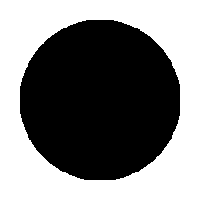

array(['circle'], dtype='<U8')

In [32]:
pil_image136 = Image.open("shapes/circle_test2.png").convert('1').resize((200, 200))
test_image136 = [ 255 if pixel else 0 for pixel in np.asarray(pil_image136).flatten() ]
display(pil_image136)
le.inverse_transform(classifier_3.predict([test_image136]))

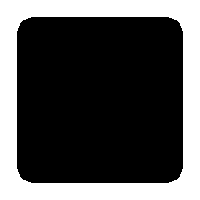

array(['square'], dtype='<U8')

In [33]:
pil_image133 = Image.open("shapes/black_test3.png").convert('1').resize((200, 200))
test_image133 = [ 255 if pixel else 0 for pixel in np.asarray(pil_image133).flatten() ]
display(pil_image133)
le.inverse_transform(classifier_3.predict([test_image133]))

# Code used to generate second data set

In [ ]:
#def zoom_at(img, x, y, zoom):
 #   w, h = img.size
  ##  zoom2 = zoom * 2
    #img = img.crop((x - w / zoom2, y - h / zoom2, 
  #                  x + w / zoom2, y + h / zoom2))
    #return img.resize((w, h), Image.LANCZOS)
#image123 = Image.open("/Users/jakeburditt/Desktop/2022 Semester 1/DSP/shapes-classifier-main/shapes/test_star.png")
#image1234 = zoom_at(image123,100,100,1.5)
#image1234.save("/Users/jakeburditt/Desktop/2022 Semester 1/DSP/shapes-classifier-main/shapes/test_star_zoom.png")

#from PIL import Image, ImageDraw, ImageOps
#path = "/Users/jakeburditt/Desktop/2022 Semester 1/DSP/shapes-classifier-main/shapes/"
#for x in ["circle", "square", "triangle", "star"]:
 #   for i in range(100):
  #          image1  = Image.open(str(path)+str(x)+"/"+str(i)+".png")  # could also open an existing image here to draw shapes over it
        # can vary this bit to draw different shapes in different positions
           
   #         for j in range(1,4,1):
    #            rotated_image1 = zoom_at(image1,100,100,(1+j*0.25))
               
     #           rotated_image1.save(str(path)+"set2/"+str(x)+"/" +str(i+(j-1)*100)+'.png')